In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from tensorflow.keras.applications import VGG16

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    "./data/train",
    target_size=(128,128),
    batch_size=16,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "./data/test",
    target_size=(128,128),
    batch_size=16,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

Found 735 images belonging to 7 classes.
Found 315 images belonging to 7 classes.


In [3]:

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss') < 0.05):
            self.model.stop_training = True
    
        
        
            
callbacks = myCallback()

In [4]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
vgg16_model.trainable = False

In [5]:
layers = Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dense(7, activation='softmax')
])

model = tf.keras.Sequential([vgg16_model, layers])
    
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 sequential (Sequential)     (None, 7)                 4198407   
                                                                 
Total params: 18,913,095
Trainable params: 4,198,407
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
epochs = 20

history = model.fit(x = train_generator,
                    validation_data=test_generator ,
                    batch_size=16,
                    verbose=1, 
                    epochs=epochs,
                    callbacks=[callbacks]
                   )

Epoch 1/20
46/46 [==============================] - 30s 637ms/step - loss: 1.9771 - accuracy: 0.4218 - val_loss: 1.0862 - val_accuracy: 0.5873
Epoch 2/20
46/46 [==============================] - 31s 686ms/step - loss: 0.8162 - accuracy: 0.7429 - val_loss: 0.6986 - val_accuracy: 0.7524
Epoch 3/20
46/46 [==============================] - 32s 689ms/step - loss: 0.5528 - accuracy: 0.8367 - val_loss: 0.3054 - val_accuracy: 0.9206
Epoch 4/20
46/46 [==============================] - 32s 697ms/step - loss: 0.3506 - accuracy: 0.9129 - val_loss: 0.2294 - val_accuracy: 0.9492
Epoch 5/20
46/46 [==============================] - 32s 692ms/step - loss: 0.3813 - accuracy: 0.8884 - val_loss: 0.2741 - val_accuracy: 0.9143
Epoch 6/20
46/46 [==============================] - 31s 687ms/step - loss: 0.2505 - accuracy: 0.9238 - val_loss: 0.1234 - val_accuracy: 0.9746
Epoch 7/20
46/46 [==============================] - 32s 696ms/step - loss: 0.2435 - accuracy: 0.9306 - val_loss: 0.1027 - val_accuracy: 0.9746

In [7]:
model.evaluate(test_generator)

20/20 [==============================] - 10s 484ms/step - loss: 0.0482 - accuracy: 0.9873


[0.04817352443933487, 0.9873015880584717]

In [8]:
no_epochs = len(history.history['loss'])

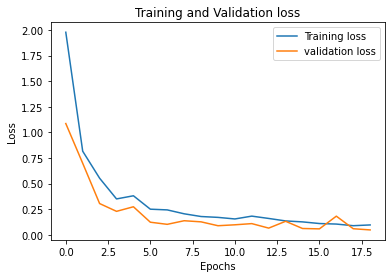

In [9]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
ep = range(no_epochs)
plt.plot(ep, loss_train, label='Training loss')
plt.plot(ep, loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

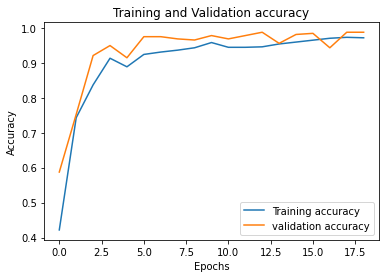

In [10]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ep = range(no_epochs)
plt.plot(ep, loss_train,label='Training accuracy')
plt.plot(ep, loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
def single_predict(file):
    test_image=load_img(file, target_size=(128,128))
    test_image=img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    sorted_classes = ['10', '100', '20', '200', '2000', '50', '500']
    return sorted_classes[result.argmax()]

In [12]:
single_predict("data/single/2000rs.jpg")

1/1 [==============================] - 0s 173ms/step


'2000'

In [13]:
train_generator.class_indices

{'10': 0, '100': 1, '20': 2, '200': 3, '2000': 4, '50': 5, '500': 6}

In [14]:
# model.save_weights('optimised_CNN')

In [15]:
# import cv2
# import numpy as np


# url = input()
# cap = cv2.VideoCapture(url+"/video")

# while(True):
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     fontScale = 1
#     color = (255, 0, 0)
#     thickness = 2
    
#     ret, frame = cap.read()
#     cv2.imwrite("cv_clicked.jpg",frame)
#     res = single_predict("cv_clicked.jpg")
#     print(res)
#     cv2.putText(frame,res,(50, 50),font,fontScale,color,thickness)
#     cv2.imshow('frame',frame)
    
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()